In [5]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df1 = pd.read_csv("surveydata.csv")
df1.head()


,id,city,gender,age,hh_size,hh_type,education,height,weight,waist
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0


In [6]:
df2 = pd.read_csv("stepsdata.csv", sep=";")
df2.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,641.0,4045.0,2310.0,2480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,25.0,4067.0,7192.0,154.0,8674.0,8275.0,850.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = pd.merge(df1, df2, on = 'id') #'id' is the common identifier
df.head()

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df['waist'].value_counts() #Get all the values. This may be less useful when there are many values.

90.0     46
80.0     46
84.0     35
83.0     32
82.0     30
         ..
131.0     1
36.0      1
39.0      1
35.0      1
147.0     1
Name: waist, Length: 85, dtype: int64

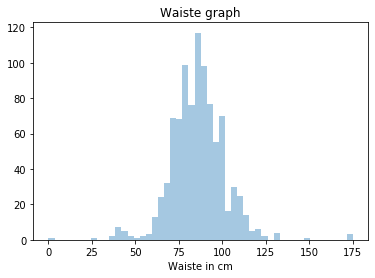

In [9]:
sns.distplot(df['waist'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Waist graph')
plt.xlabel('Waist in cm')
plt.show()

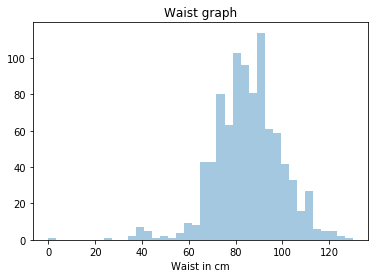

In [11]:
# The handy Pandas function to_numeric converts non-numeric data to NaN. The last argument overrides the errors
# Python would normally generate.
# The apply method of a dataframe lets us apply a function to all the elements.
df['waist'] = df['waist'].apply(pd.to_numeric, errors='coerce')

#To remove the values above 5 we need to create a function that we then apply to the entire column
def above_130(x):
    if(x > 130): 
        return float('NaN')
    else: 
        return x
df['waist'] = df['waist'].apply(above_130)

sns.distplot(df['waist'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Waist graph')
plt.xlabel('Waist in cm')
plt.show()

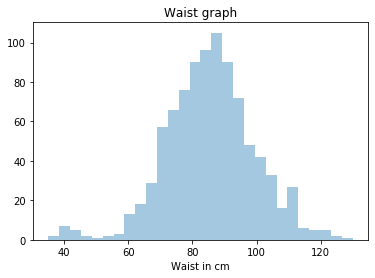

In [12]:
def under_30(x):
    if(x < 30): 
        return float('NaN')
    else: 
        return x
df['waist'] = df['waist'].apply(under_30)

sns.distplot(df['waist'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Waist graph')
plt.xlabel('Waist in cm')
plt.show()

In [14]:
df.to_csv("mergedata.csv")